# Multiple Linear Regression

problem statement :

For a given dataset predict number of bikes getting shared based on different parameters 
    https://drive.google.com/open?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXizst    

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np
#importing job-lib
import joblib

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score


# loading csv data from the file given in the url
data_set = pd.read_csv("bike_sharing.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### data pre - processing

In [2]:
# peeking at top five values of data set
data_set.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# looking at column names
data_set.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
# dropping un- necessary columns
data_set = data_set.drop(['instant','registered','casual','workingday','atemp','hum','dteday'],axis=1)

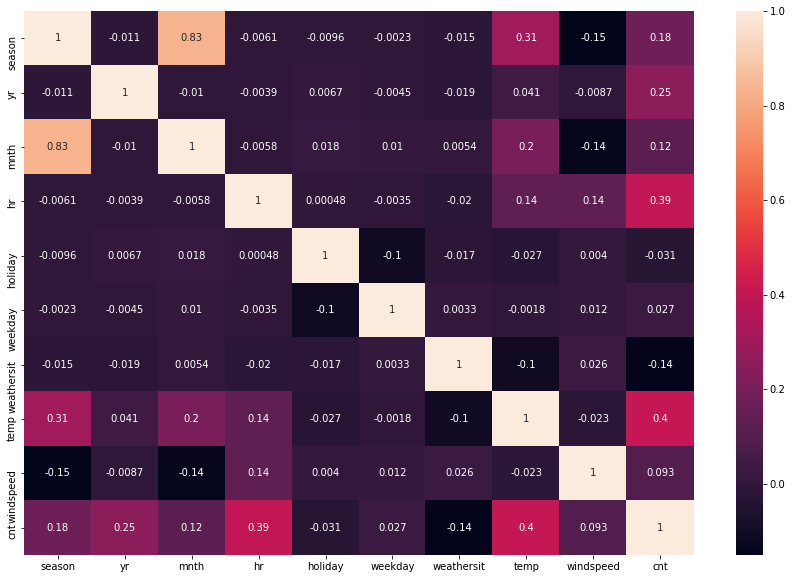

In [5]:
# plotting heat-map to see corerlations between features
plt.figure(figsize=(15,10))
sea.heatmap(data_set.corr(),annot = True)

In [6]:
#looking at data description
data_set.describe()

,season,yr,mnth,hr,holiday,weekday,weathersit,temp,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,0.496987,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,0.192556,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.340000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,0.660000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,1.000000,0.850700,977.000000


In [7]:
data_set.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit',
       'temp', 'windspeed', 'cnt'],
      dtype='object')

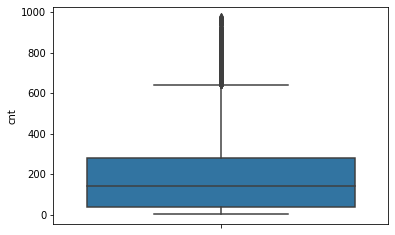

In [8]:
# plotting boxplot to see outliers in cnt column
sea.boxplot(y =data_set['cnt'])

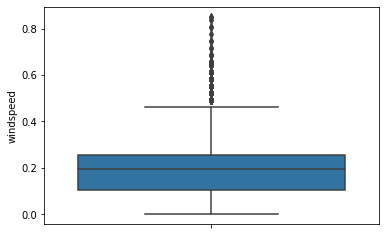

In [9]:
# plotting boxplot to see out liers in windspeed column
sea.boxplot(y =data_set['windspeed'])

In [10]:
#removing outliers
data_set = data_set.drop(data_set.loc[data_set['cnt']>600].index,axis = 0)
data_set = data_set.drop(data_set.loc[data_set['windspeed']>0.43].index,axis = 0)

#### one - hot encoding of catagorical columns only

In [11]:
### one hot encoding of season column
data = pd.get_dummies(data_set['season'])
data = data.rename(columns = {1: "a",2:"b", 3: "c",4:'d'}) 
data_set = pd.concat([data_set,data],axis=1)
data_set = data_set.drop(['season'],axis=1)

### one hot encoding of weekday column
data = pd.get_dummies(data_set['weekday'])
data = data.rename(columns = {0:'e',1: "f",2:"g", 3: "h",4:'i',5:'j',6:'k'}) 
data_set = pd.concat([data_set,data],axis=1)
data_set = data_set.drop(['weekday'],axis=1)

### one hot encoding of weathersit column
data = pd.get_dummies(data_set['weathersit'])
data = data.rename(columns = {1: "l",2:"m", 3: "n",4:'o'}) 
data_set = pd.concat([data_set,data],axis=1)
data_set = data_set.drop(['weathersit'],axis=1)

### one hot encoding of mnth column
data = pd.get_dummies(data_set['mnth'])
data = data.rename(columns = {1: "p",2:"q", 3: "r",4:'s',5:'t',6:'u',7:'v',8:'w',9:'x',10:'y',11:'z',12:'a1'}) 
data_set = pd.concat([data_set,data],axis=1)
data_set = data_set.drop(['mnth'],axis=1)

In [12]:
#looking at data set head after one hot encoding
data_set.head()

,yr,hr,holiday,temp,windspeed,cnt,a,b,c,d,...,r,s,t,u,v,w,x,y,z,a1
0,0,0,0,0.24,0.0,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0.22,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0.22,0.0,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0.24,0.0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0.24,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# getting all column names after encoding
data_set.columns

Index(['yr', 'hr', 'holiday', 'temp', 'windspeed', 'cnt', 'a', 'b', 'c', 'd',
       'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
       's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a1'],
      dtype='object')

#### Splitting train and test data 

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_set[['yr', 'hr', 'holiday', 'temp', 'windspeed','a', 'b', 'c', 'd',
       'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
       's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a1']], data_set['cnt'], train_size=0.70,test_size=0.30, random_state=42) 

In [15]:
#converting each set into numpy arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

#### making multiple linear regression model

In [16]:
#obtaining an object of linear regression class 
regressor = LinearRegression(normalize=True)  
# calling fit method to perform training
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [17]:
joblib.dump(regressor,'02_mlr_regressor.pkl')

['02_mlr_regressor.pkl']

In [18]:
#retrieving the intercept:
print(regressor.intercept_)
#retrieving the slope:
print(regressor.coef_)

80665164555754.28
[ 5.00996596e+01  7.66351115e+00 -1.35514054e+01  3.99800511e+02
  1.04507473e+02  1.72009729e+14  1.72009729e+14  1.72009729e+14
  1.72009729e+14 -5.94924789e+13 -5.94924789e+13 -5.94924789e+13
 -5.94924789e+13 -5.94924789e+13 -5.94924789e+13 -5.94924789e+13
  1.38067786e+14  1.38067786e+14  1.38067786e+14  1.38067786e+14
 -3.31250201e+14 -3.31250201e+14 -3.31250201e+14 -3.31250201e+14
 -3.31250201e+14 -3.31250201e+14 -3.31250201e+14 -3.31250201e+14
 -3.31250201e+14 -3.31250201e+14 -3.31250201e+14 -3.31250201e+14]


In [19]:
#predicting the output of test data set
y_pred = regressor.predict(X_test)

In [20]:
#predicting the output of train data set
y_pred_train = regressor.predict(X_train)

#### Calculating errors and scores

In [21]:
#calculating different types of errors 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 91.30740721542608
Mean Squared Error: 14247.675048271305
Root Mean Squared Error: 119.36362531471346


In [22]:
#determining accuracy of test data sets
r_2_score = regressor.score(X_test,y_test)
print(r_2_score*100,'%')

38.834849442872375 %


In [23]:
#determining accuracy of train data set
r_2_score_train = regressor.score(X_train,y_train)
print(r_2_score_train*100,'%')

37.88793540292307 %
